# E9 213 Time Frequency Analysis - Assignment 2
***
*Submitted by: Dwaipayan Haldar*<br>
*S.R. No. : 27128*

<div style="padding:10px; background-color:#ffe6e6;">
  Here, I have used ipywidgets's interact tool to make interactive slider for problem number 5 and 6. In order to run in any other system, one must install ipywidgets in their current environment. <a href="https://ipywidgets.readthedocs.io/en/latest/user_install.html">Here</a> is how to install it. 
</div>

In [ ]:
# Code to import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, fftshift
import ipywidgets as widgets
from ipywidgets import interact

### Problem 1: Plot $cos(w_0t)$ and its fourier Transform and magnitude
Here $w_o$ is taken to be $50 Hz.$

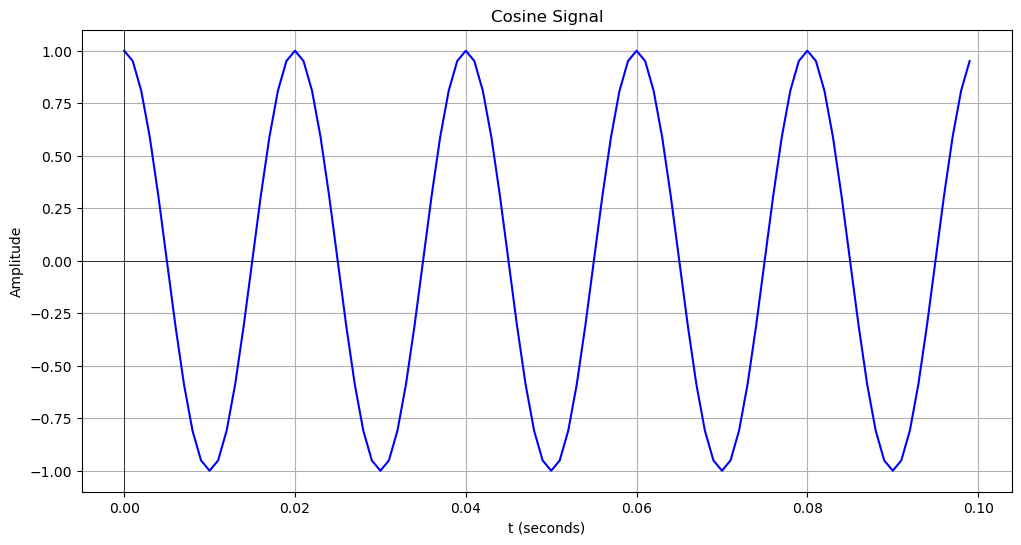

In [4]:
#Code to generate the cosine signal
t = np.arange(0, 0.1, 0.001) # Here T_s = 0.001s.  
y = np.cos(100*np.pi*t)

#Code to sketch the signal
plt.figure(figsize=(12, 6)) 
plt.plot(t, y, color='blue')
plt.xlabel('t (seconds)')
plt.ylabel('Amplitude')
plt.title('Cosine Signal')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5) 
plt.axvline(0, color='black', linewidth=0.5) 

plt.savefig('A2_P1.png')
plt.show()

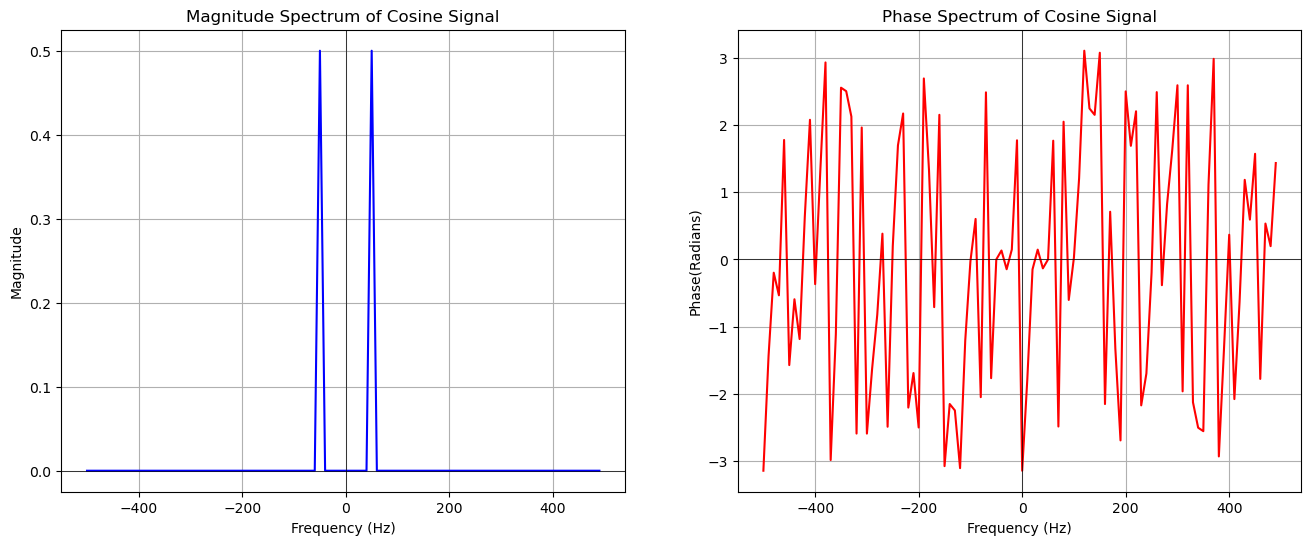

In [6]:
#Computing the FFT of the signal
y_fft = fft(y)
y_fft_shifted = fftshift(y_fft) 
t_fft = fftshift(fftfreq(len(t), d=(t[1]-t[0]))) 

# Plotting the magnitude and phase spectrum
plt.figure(figsize=(16, 6))
plt.subplot(1,2,1)
plt.plot(t_fft, np.abs(y_fft_shifted)/len(y), color='blue')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum of Cosine Signal')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5) 
plt.axvline(0, color='black', linewidth=0.5) 
plt.subplot(1,2,2)
plt.plot(t_fft, np.angle(y_fft_shifted), color = 'red')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase(Radians)')
plt.title('Phase Spectrum of Cosine Signal')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5) 
plt.axvline(0, color='black', linewidth=0.5) 
plt.savefig('A2_P2.png')
plt.show()

### Problem 2: Plot $\frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{x^2}{2\sigma^2}}, \; x \in \mathbb{R}, \quad \frac{1}{\pi(1+x^2)}, \; x \in \mathbb{R}, \quad \lambda e^{-\lambda x}, \; x \geq 0$
Here $\lambda$ should be greater than $0$.

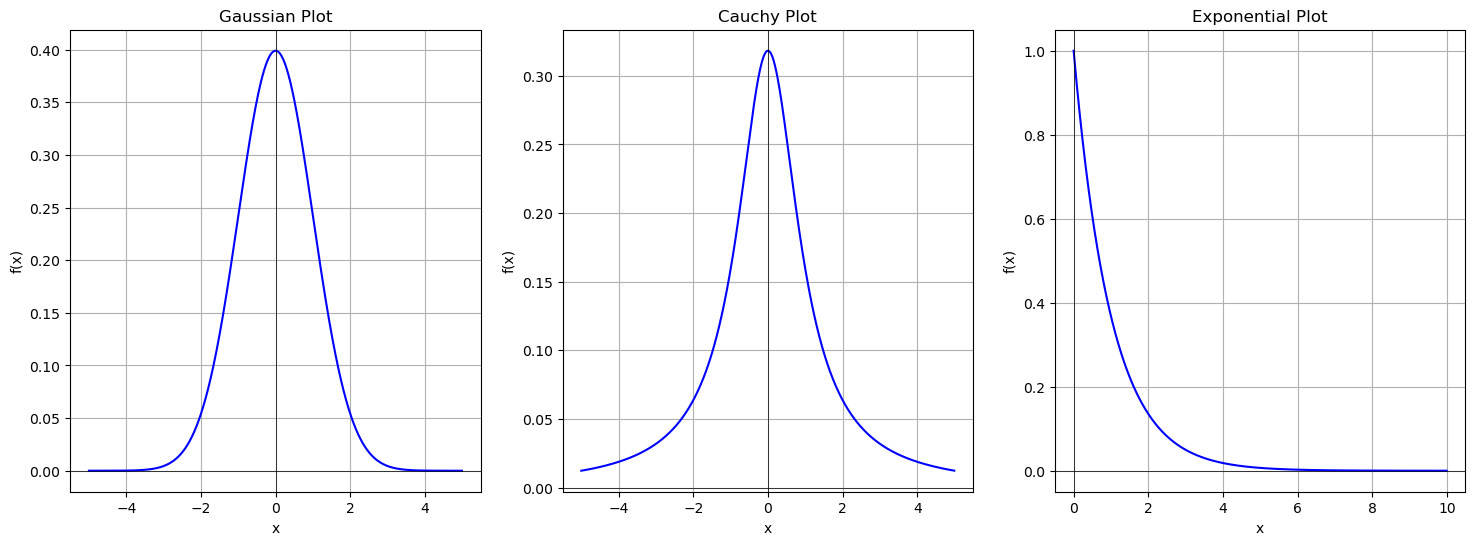

In [15]:
def gaussian(sigma=1):
    x = np.arange(-5,5,0.01)
    y = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-(x**2 / (2 * sigma**2)))
    return x,y

def cauchy():
    x = np.arange(-5,5,0.01)
    y = (1/(np.pi *(1+x**2)))
    return x,y

def exponential(k=1,l=1):
    x = np.arange(0,10,0.01)
    y = k*l*np.exp(-l*x)
    return x,y

x_gaussian, y_gaussian = gaussian()
x_cauchy, y_cauchy = cauchy()
x_exp, y_exp = exponential()

plt.figure(figsize = (18,6))
plt.subplot(1,3,1)
plt.plot(x_gaussian, y_gaussian, color='blue')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gaussian Plot')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5) 
plt.axvline(0, color='black', linewidth=0.5) 
plt.subplot(1,3,2)
plt.plot(x_cauchy, y_cauchy, color='blue')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Cauchy Plot')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5) 
plt.axvline(0, color='black', linewidth=0.5) 
plt.subplot(1,3,3)
plt.plot(x_exp, y_exp, color='blue')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Exponential Plot')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5) 
plt.axvline(0, color='black', linewidth=0.5) 
plt.show()

### Problem 3: Compute the characteristics function of the functions given in problem 2 analytically and plot phase and frequency response.
After calculating analytically, the characteristics function of Gaussian comes as $ e^{-\frac{t^2\sigma^2}{2}} $, for Cauchy it comes out to be $ e^{-|t|} $, for gamma it is $\frac{k\lambda}{(\lambda - jt)}$

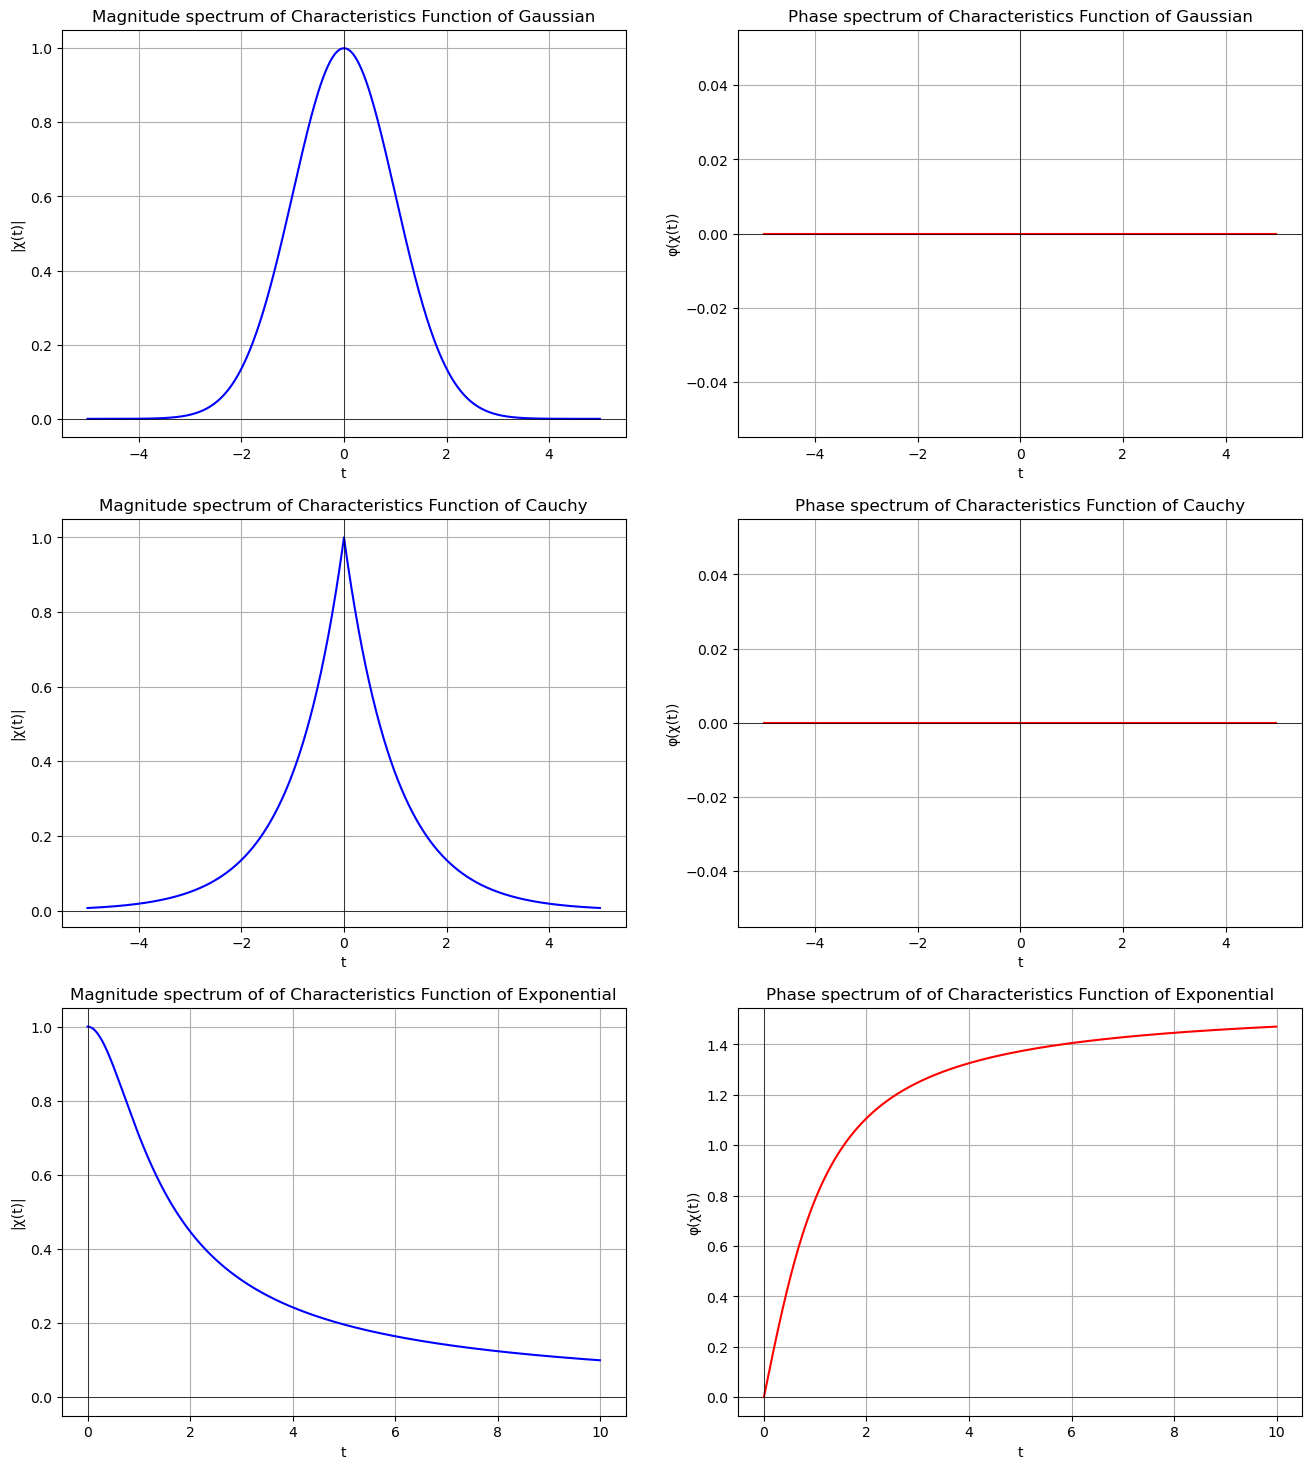

In [16]:
def char_gaussian(sigma=1):
    t = np.arange(-5,5,0.01)
    y = np.exp(-(t**2 * sigma**2/ 2))
    return t,y

def char_cauchy():
    t = np.arange(-5,5,0.01)
    y = np.exp(-np.abs(t))
    return t,y

def char_exponential(k=1,l=1):
    t = np.arange(0,10,0.01)
    y = (k*l)/(l - 1j*t)
    return t,y

t_char_gaussian, y_char_gaussian = char_gaussian()
t_char_cauchy, y_char_cauchy = char_cauchy()
t_char_exp, y_char_exp = char_exponential()

#Ploting the magnitude and phase spectrum for all. The phase in two of them is zero.
plt.figure(figsize=(16,18))

plt.subplot(3,2,1)
plt.plot(t_char_gaussian, np.abs(y_char_gaussian), color='blue')
plt.xlabel('t')
plt.ylabel('|\u03C7(t)|')
plt.title('Magnitude spectrum of Characteristics Function of Gaussian')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5) 
plt.axvline(0, color='black', linewidth=0.5) 
plt.subplot(3,2,2)
plt.plot(t_char_gaussian, np.angle(y_char_gaussian), color='red')
plt.xlabel('t')
plt.ylabel('\u03C6(\u03C7(t))')
plt.title('Phase spectrum of Characteristics Function of Gaussian')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5) 
plt.axvline(0, color='black', linewidth=0.5) 

plt.subplot(3,2,3)
plt.plot(t_char_cauchy, np.abs(y_char_cauchy), color='blue')
plt.xlabel('t')
plt.ylabel('|\u03C7(t)|')
plt.title('Magnitude spectrum of Characteristics Function of Cauchy')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5) 
plt.axvline(0, color='black', linewidth=0.5) 
plt.subplot(3,2,4)
plt.plot(t_char_cauchy, np.angle(y_char_cauchy), color='red')
plt.xlabel('t')
plt.ylabel('\u03C6(\u03C7(t))')
plt.title('Phase spectrum of Characteristics Function of Cauchy')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5) 
plt.axvline(0, color='black', linewidth=0.5) 

plt.subplot(3,2,5)
plt.plot(t_char_exp, np.abs(y_char_exp), color='blue')
plt.xlabel('t')
plt.ylabel('|\u03C7(t)|')
plt.title('Magnitude spectrum of of Characteristics Function of Exponential')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5) 
plt.axvline(0, color='black', linewidth=0.5) 
plt.subplot(3,2,6)
plt.plot(t_char_exp, np.angle(y_char_exp), color='red')
plt.xlabel('t')
plt.ylabel('\u03C6(\u03C7(t))')
plt.title('Phase spectrum of of Characteristics Function of Exponential')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5) 
plt.axvline(0, color='black', linewidth=0.5) 

plt.show()


### Problem 4: Plot $e^{j \omega_0 t}, k e^{j \omega_0 t} e^{-\frac{(t-t_0)^2}{2\sigma^2}}, e^{j(\alpha t^2 + \beta t + \gamma)}$ 

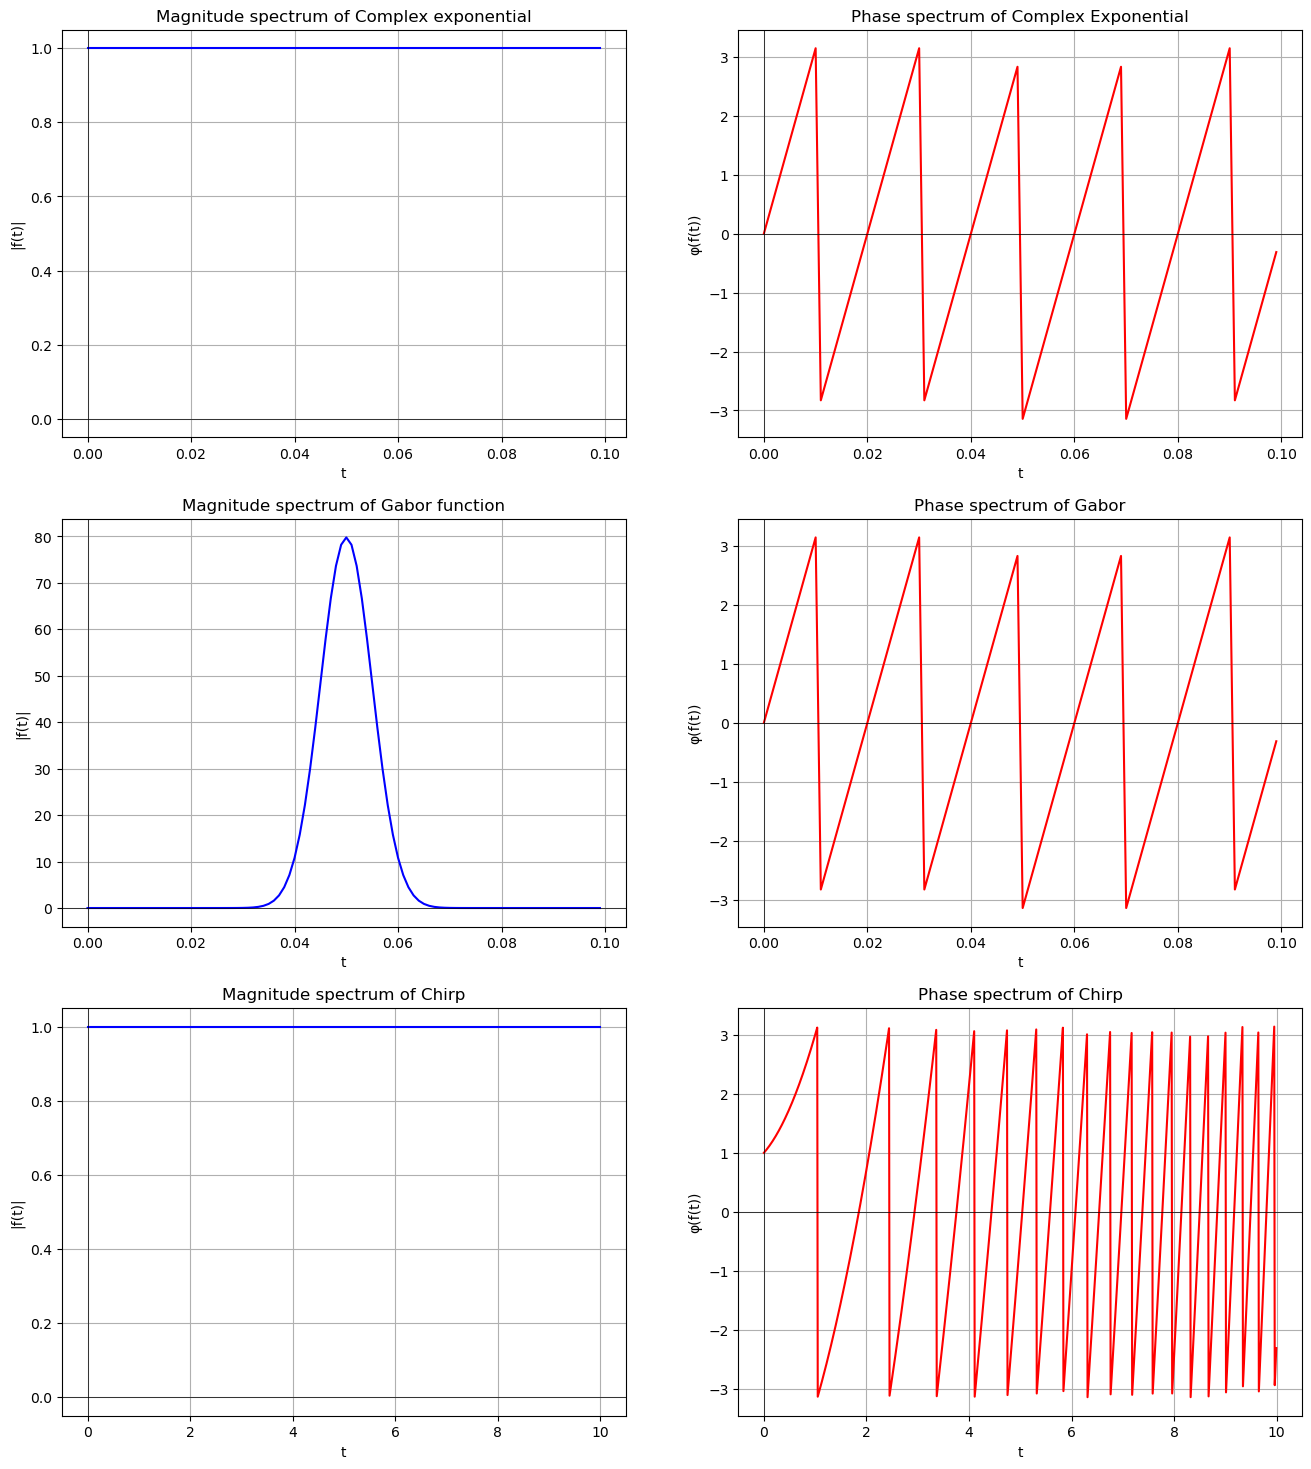

In [42]:
def com_exp(omega = 100*np.pi):
    t = np.arange(0, 0.1, 0.001)
    y = np.exp(1j*omega*t)
    return t,y

def gabor(omega = 100*np.pi, t_0 = 0.05, sigma = 0.005):
    t = np.arange(0, 0.1, 0.001)
    y = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-((t-t_0)**2 / (2 * sigma**2))) * np.exp(1j*omega*t)
    return t,y

def chirp(a = 1, b = 1, c =1):
    t = np.arange(0, 10, 0.01)
    y = np.exp(1j*(a*t**2+b*t+c))
    return t,y

t_com_exp, y_com_exp = com_exp()
t_gabor, y_gabor = gabor()
t_chirp, y_chirp = chirp()

plt.figure(figsize=(16,18))

plt.subplot(3,2,1)
plt.plot(t_com_exp, np.abs(y_com_exp), color='blue')
plt.xlabel('t')
plt.ylabel('|f(t)|')
plt.title('Magnitude spectrum of Complex exponential')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5) 
plt.axvline(0, color='black', linewidth=0.5) 
plt.subplot(3,2,2)
plt.plot(t_com_exp, np.angle(y_com_exp), color='red')
plt.xlabel('t')
plt.ylabel('\u03C6(f(t))')
plt.title('Phase spectrum of Complex Exponential')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5) 
plt.axvline(0, color='black', linewidth=0.5) 

plt.subplot(3,2,3)
plt.plot(t_gabor, np.abs(y_gabor), color='blue')
plt.xlabel('t')
plt.ylabel('|f(t)|')
plt.title('Magnitude spectrum of Gabor function')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5) 
plt.axvline(0, color='black', linewidth=0.5) 
plt.subplot(3,2,4)
plt.plot(t_gabor, np.angle(y_gabor), color='red')
plt.xlabel('t')
plt.ylabel('\u03C6(f(t))')
plt.title('Phase spectrum of Gabor')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5) 
plt.axvline(0, color='black', linewidth=0.5) 

plt.subplot(3,2,5)
plt.plot(t_chirp, np.abs(y_chirp), color='blue')
plt.xlabel('t')
plt.ylabel('|f(t)|')
plt.title('Magnitude spectrum of Chirp')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5) 
plt.axvline(0, color='black', linewidth=0.5) 
plt.subplot(3,2,6)
plt.plot(t_chirp, np.angle(y_chirp), color='red')
plt.xlabel('t')
plt.ylabel('\u03C6(f(t))')
plt.title('Phase spectrum of Chirp')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5) 
plt.axvline(0, color='black', linewidth=0.5) 

plt.show()


### Problem 5: Plot: $\frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$ and its Fourier Transform. Vary $\sigma$ and $\mu$.

In [ ]:
def gaussian(mu = 0, sigma=1):
    x = np.arange(-5,5,0.05)
    y = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-((x-mu)**2 / (2 * sigma**2)))
    x_freq = fftshift(fftfreq(len(x), d=(x[1]-x[0]))) 
    x_freq = 2*np.pi*x_freq
    y_freq = np.exp(-((x_freq**2 * sigma**2)/2))* np.exp(1j*mu* x_freq)
    plt.figure(figsize=(16,6))
    plt.subplot(1,2,1)
    plt.plot(x, y, color='blue')
    plt.xlabel('x')
    plt.ylabel('\u03A8(x)')
    plt.title('Gaussian Distribution')
    plt.grid(True)
    plt.axhline(0, color='black', linewidth=0.5) 
    plt.axvline(0, color='black', linewidth=0.5)
    plt.subplot(1,2,2)
    plt.plot(x_freq,np.abs(y_freq), color = 'red')
    plt.xlabel('\u03A9')
    plt.ylabel('|\u03A8(x)|')
    plt.title('Magnitude Spectrum of Fourier Transform of the Gaussian Distribution')
    plt.grid(True)
    plt.axhline(0, color = 'black', linewidth = 0.5)
    plt.axvline(0, color = 'black', linewidth = 0.5)
    plt.show()


interact(gaussian, 
         mu=widgets.FloatSlider(min=0, max=3, step=0.1, value=0, description='\u03BC'),
         sigma=widgets.FloatSlider(min=0.1, max=2, step=0.01, value=1, description = '\u03C3'))

interactive(children=(FloatSlider(value=0.0, description='μ', max=3.0), FloatSlider(value=1.0, description='σ'…

<function __main__.gaussian(mu=0, sigma=1)>

### Problem 6: Plot: $\frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}} e^{j\omega_0x}$ and its Fourier Transform. Vary $\mu$, $\sigma$ and $\omega_0$.

In [12]:
def gabor(mu = 0, sigma=1, omega = 0):
    x = np.arange(-5,5,0.05)
    y = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-((x-mu)**2 / (2 * sigma**2))) * np.exp(1j*omega*x)
    x_freq = fftshift(fftfreq(len(x), d=(x[1]-x[0]))) 
    x_freq = 2*np.pi*x_freq
    y_freq = np.exp(-((x_freq - omega)**2 * sigma**2)/2)* np.exp(1j*mu* (x_freq - omega))
    plt.figure(figsize=(16,6))
    plt.subplot(1,2,1)
    plt.plot(x, np.abs(y), color='blue')
    plt.xlabel('x')
    plt.ylabel('gabor(x)')
    plt.title('Gaussian Distribution')
    plt.grid(True)
    plt.axhline(0, color='black', linewidth=0.5) 
    plt.axvline(0, color='black', linewidth=0.5)
    plt.subplot(1,2,2)
    plt.plot(x_freq,np.abs(y_freq), color = 'red')
    plt.xlabel('\u03A9')
    plt.ylabel('|gabor(x)|')
    plt.title('Magnitude Spectrum of Fourier Transform of the Gaussian Distribution')
    plt.grid(True)
    plt.axhline(0, color = 'black', linewidth = 0.5)
    plt.axvline(0, color = 'black', linewidth = 0.5)
    plt.show()


interact(gabor, 
         mu=widgets.FloatSlider(min=0, max=3, step=0.1, description='\u03BC'),
         sigma=widgets.FloatSlider(min=0.1, max=2, step=0.01, description = '\u03C3'),
         omega = widgets.FloatSlider(min = 0, max = 50, step = np.pi, description = '\u03C9 \u2080'))

interactive(children=(FloatSlider(value=0.0, description='μ', max=3.0), FloatSlider(value=0.1, description='σ'…

<function __main__.gabor(mu=0, sigma=1, omega=0)>